<a href="https://colab.research.google.com/github/Ankitchimaniya/Machine-Learning-Lab/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

In [84]:
batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [85]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),padding='same', strides=(1, 1),activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),strides=(1, 1), padding='same',activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 32)                100384    
_________________________________________________________________
dense_44 (Dense)             (None, 10)              

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 14s 321us/step - loss: 0.0280 - acc: 0.9910 - val_loss: 0.0361 - val_acc: 0.9887
Epoch 2/5
45000/45000 [==============================] - 14s 321us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0322 - val_acc: 0.9908
Epoch 3/5
45000/45000 [==============================] - 14s 320us/step - loss: 0.0158 - acc: 0.9949 - val_loss: 0.0368 - val_acc: 0.9892
Epoch 4/5
45000/45000 [==============================] - 14s 321us/step - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0355 - val_acc: 0.9901
Epoch 5/5
45000/45000 [==============================] - 14s 319us/step - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0361 - val_acc: 0.9905


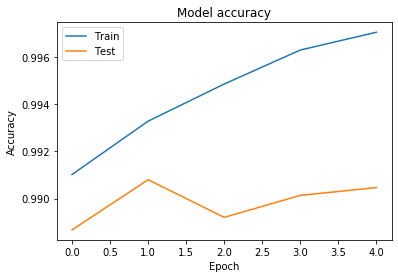

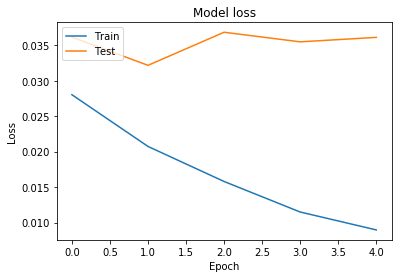

In [89]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, validation_split=0.25, epochs=5, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [86]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=6,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 5s 81us/step - loss: 0.2345 - acc: 0.9286 - val_loss: 0.0754 - val_acc: 0.9753
Epoch 2/6
60000/60000 [==============================] - 3s 45us/step - loss: 0.0640 - acc: 0.9807 - val_loss: 0.0463 - val_acc: 0.9848
Epoch 3/6
60000/60000 [==============================] - 3s 46us/step - loss: 0.0451 - acc: 0.9862 - val_loss: 0.0429 - val_acc: 0.9859
Epoch 4/6
60000/60000 [==============================] - 3s 45us/step - loss: 0.0350 - acc: 0.9890 - val_loss: 0.0379 - val_acc: 0.9878
Epoch 5/6
60000/60000 [==============================] - 3s 43us/step - loss: 0.0278 - acc: 0.9913 - val_loss: 0.0359 - val_acc: 0.9888
Epoch 6/6
60000/60000 [==============================] - 3s 45us/step - loss: 0.0222 - acc: 0.9927 - val_loss: 0.0408 - val_acc: 0.9873


In [88]:
score = model.evaluate(x_test, y_test, verbose=6)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04075819058656052
Test accuracy: 0.9873
